In [1]:
from __future__ import print_function
import pylab as pl
import numpy as np
import math
import scipy.stats as st

%pylab inline

Populating the interactive namespace from numpy and matplotlib


We will set the mean to be 10 for each of the distributions. In terms of the `numpy` parameters for each distribution:
*  `mu_normal = loc`
*  `mu_poisson = lam`
*  `mu_binomial = n * p` (we use `n = 20, p = 0.5`)
*  `mu_chisquare = df`
*  `mu_rayleigh = scale *` $\sqrt{\pi/2}$ (we set scale to 10 $\sqrt{2/\pi}$)
*  `mu_wald = mean`

The normal and wald distributions require a second `scale` parameter which gets set to 1.

In [2]:
distparams = {'normal': [10,1],
              'poisson': [10], 
              'binomial': [20,.5],
              'chisquare': [10],
              'rayleigh': [10*math.sqrt(2/math.pi)],
              'wald': [10,1]}

In [3]:
sizes = np.array(logspace(log10(11),log10(1999),100))

In [4]:
distributions = {k: {s: getattr(np.random,k)(*v, size=s) for s in sizes} for (k, v) in distparams.iteritems()}

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


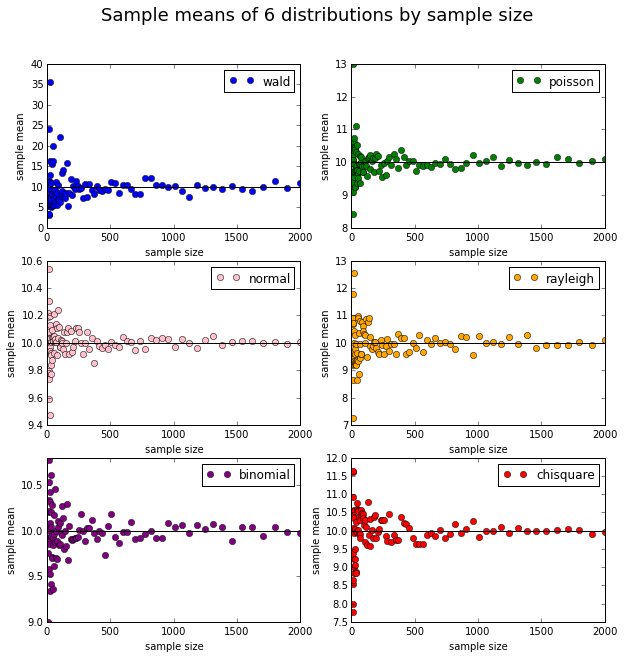

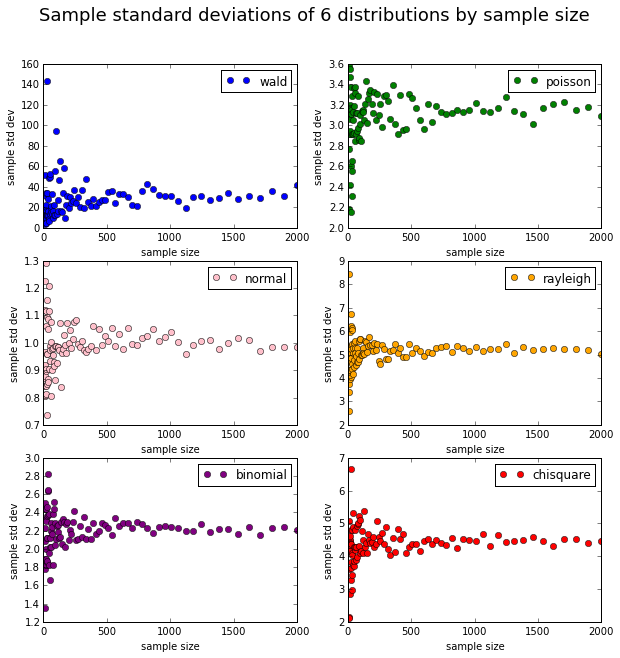

In [5]:
fig_mu_N = pl.figure(figsize=(10,10))
fig_mu_N.suptitle('Sample means of 6 distributions by sample size',size=18)
fig_s_N = pl.figure(figsize=(10,10))
fig_s_N.suptitle('Sample standard deviations of 6 distributions by sample size',size=18)
ax={}
axs={}
means={}
sds={}
i = 0
colors = ['blue','green','pink','orange','purple','red']
for distname in distributions.iterkeys():
    i += 1
    ax[distname] = fig_mu_N.add_subplot(3,2,i)
    axs[distname] = fig_s_N.add_subplot(3,2,i)
    means[distname] = [distributions[distname][nn].mean() for nn in sizes]
    sds[distname] = [distributions[distname][nn].std() for nn in sizes]
    ax[distname].plot(sizes, means[distname], 
                      'o', label = distname, color = colors[i-1])
    ax[distname].legend()   
    ax[distname].set_xlabel('sample size')
    ax[distname].set_ylabel('sample mean')
    ax[distname].plot([min(sizes), max(sizes)], [10,10], 'k')
    axs[distname].plot(sizes, sds[distname], 
                      'o', label = distname, color = colors[i-1])
    axs[distname].legend()   
    axs[distname].set_xlabel('sample size')
    axs[distname].set_ylabel('sample std dev')

(array([   1.,    5.,    4.,    3.,    2.,    5.,    4.,    7.,    4.,
           7.,   13.,   22.,   40.,   72.,  226.,   75.,   32.,   19.,
          13.,    6.,    2.,    3.,    2.,    2.,    2.,    0.,    1.,
           0.,    2.]),
 array([  7.        ,   7.20689655,   7.4137931 ,   7.62068966,
          7.82758621,   8.03448276,   8.24137931,   8.44827586,
          8.65517241,   8.86206897,   9.06896552,   9.27586207,
          9.48275862,   9.68965517,   9.89655172,  10.10344828,
         10.31034483,  10.51724138,  10.72413793,  10.93103448,
         11.13793103,  11.34482759,  11.55172414,  11.75862069,
         11.96551724,  12.17241379,  12.37931034,  12.5862069 ,
         12.79310345,  13.        ]),
 <a list of 29 Patch objects>)

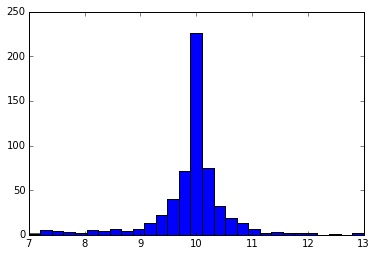

In [6]:
pl.hist([x for y in means.values() for x in y], bins=linspace(7,13,30))

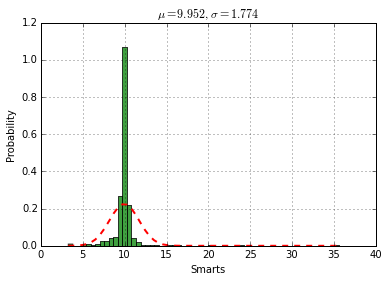

In [7]:
# best fit of data
flatmeans = [x for y in means.values() for x in y]
(mu, sigma) = st.norm.fit(flatmeans)

# the histogram of the data
n, bins, patches = plt.hist(flatmeans, 60, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = pl.normpdf( bins, mu, sigma)
l = pl.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [8]:
np.mean(flatmeans)

9.9524911033459613

In [9]:
np.std(flatmeans)

1.77389904037293